<a href="https://colab.research.google.com/github/Jingut/first-repository/blob/main/Exp_(%EC%A0%9C%EC%B6%9C2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 1

dW: [ -60.54117851  -13.64857163 -189.59308638 -142.54211373  -68.24335891
  -55.9738059   127.61649395 -138.96340956 -182.82263887 -123.46443371]
db: -303.4424700408118
Iteration 10000 : Loss 4568.0544
Iteration 20000 : Loss 3593.6166
Iteration 30000 : Loss 3337.5444
Iteration 40000 : Loss 3199.2258
Iteration 50000 : Loss 3110.0654
Iteration 60000 : Loss 3047.9029
Iteration 70000 : Loss 3002.9833
Iteration 80000 : Loss 2969.9756
Iteration 90000 : Loss 2945.5032
Iteration 100000 : Loss 2927.2526
3066.627921561602


<function matplotlib.pyplot.show>

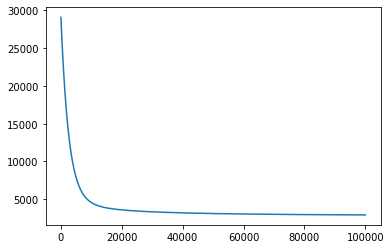

In [6]:
# (1) 데이터 가져오기
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

diabetes = load_diabetes()

# (2) 모델에 입력할 데이터 X,y 준비하기
df_x = diabetes.data
df_y = diabetes.target

diabetes = pd.DataFrame(data=df_x, columns = diabetes.feature_names)
X = np.array(df_x)
y = np.array(df_y)

# (4) train 데이터와 test 데이터로 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# (5) 모델 준비하기

W = np.random.rand(10)
b = np.random.rand() 

def model(X, W, b):
  predictions = 0
  for i in range(10):
    predictions += X[:, i] * W[i]
  predictions += b
  return predictions

# (6) 손실함수 loss 정의하기
def MSE(a, b):
  mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
  return mse

def loss(X, W, b, y):
  predictions = model(X, W, b)
  L = MSE(predictions, y)
  return L    

def gradient(X, W, b, y):
  # N은 가중치의 개수
  N = len(W)
    
  # y_pred 준비
  y_pred = model(X, W, b)
    
  # 공식에 맞게 gradient 계산
  dW = 1/N * 2 * X.T.dot(y_pred - y)
        
  # b의 gradient 계산
  db = 2 * (y_pred - y).mean()
  return dW, db

dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)    

# (8) 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.0001

# (9) 모델 학습하기
losses = []

for i in range(1, 100001):
  dW, db = gradient(X_train, W, b, y_train)
  W -= LEARNING_RATE * dW
  b -= LEARNING_RATE * db
  L = loss(X_train, W, b, y_train)
  losses.append(L)
  if i % 10000 == 0:
    print('Iteration %d : Loss %0.4f' % (i, L))


# (10) test 데이터에 대한 성능 확인하기
predictions = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)

plt.plot(losses)
plt.show()

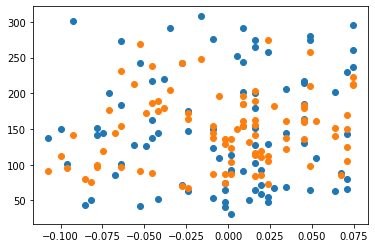

In [4]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], predictions)
plt.show()

# 회고

# 프로젝트2